In [35]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 10

I begin by importing the needed Python Libraries and setting my plot font size

In [36]:
blks = pd.read_csv("blocks.csv")
wd = pd.read_csv("walkscores.csv")

Then i read in the two data sets i will be needing

In [37]:
wd.head(5)

,Census_Tract,Walk_Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71


In [38]:
blks.head(5)

,SUMLEV,COUNTY,COUSUB,TRACT,BLKGRP,BLOCK,NAME,geoid20,Neighborhood,NeighborhoodGroup
0,750.0,3,61000,562700,2,2000,Block 2000,420035627002000,Allegheny Center,Allegheny Center
1,750.0,3,61000,562700,2,2001,Block 2001,420035627002001,Allegheny Center,Allegheny Center
2,750.0,3,61000,562700,2,2002,Block 2002,420035627002002,Allegheny Center,Allegheny Center
3,750.0,3,61000,562700,2,2003,Block 2003,420035627002003,Allegheny Center,Allegheny Center
4,750.0,3,61000,562700,2,2004,Block 2004,420035627002004,Allegheny Center,Allegheny Center


My main data of focus is the walk scores in wd, but they are organized by census tract, because we want neighborhoods the data is going to have to be modified

That is what the blks data set is for, but right now there is too much data 

In [39]:
blks = blks.filter(items=["TRACT", "BLKGRP", "Neighborhood" ])
blks.head(5)

,TRACT,BLKGRP,Neighborhood
0,562700,2,Allegheny Center
1,562700,2,Allegheny Center
2,562700,2,Allegheny Center
3,562700,2,Allegheny Center
4,562700,2,Allegheny Center


This is much better, now we can focus on translating census track to a neighborhoods
But to do this we will need to do some work

In [40]:
def TractToHood(tracts, hoods):
    columns = ["Census_Tract", "Walk_Scores"]
    
    id = tracts
    name = ""
   
    for row in hoods.itertuples():
        if row[1] == id:
            name = row[3]
    return name
    

This will be our function that translates the tract values to a neighborhood. it will be used as a map function on the dataframe.

In [41]:
wd["Census_Tract"] = wd.Census_Tract.apply(TractToHood, hoods=blks)


wd = wd[wd.Census_Tract != ""]

wd.head(5)

,Census_Tract,Walk_Score
1,Strip District,100
2,Strip District,83
3,Crawford-Roberts,77
4,West Oakland,71
5,North Oakland,82


In [42]:
wd = wd.sort_values("Walk_Score")
wd.tail(10)

,Census_Tract,Walk_Score
24,Friendship,86
22,Bloomfield,86
15,Polish Hill,88
55,Squirrel Hill South,88
17,Shadyside,88
19,Shadyside,88
20,Shadyside,89
14,Lower Lawrenceville,91
16,Shadyside,91
1,Strip District,100


Now that we translated the tracts we can see an issue with duplicates. This is becasue tracts are smaller than neighborhoods so there can be multiple for a single neighborhood. 
We can solve this will a slightly more complicated function that will return a new dataframe that has unique neighborhoods with a walkscore of the average of other entries under the same neighborhood.

In [43]:
def AvgOut(df):
    lookup = [""]
    hood = ""
    data = ({
    'Neighborhood':[],
    'Walk_Score':[]
    })
    #hd = pd.DataFrame(columns = ["Neighborhood", "Walk_Score"])
    
    hd = pd.DataFrame(data)
    for row in df.itertuples():
        hood = row[1]
        score = row[2];
       # print("this is the row" + hood)
        
        for value in df.itertuples():
            if(value[1] == row[1]):
                avg = (value[2] + row[2])/2
                score = (score + avg)/2
        
        list = [hood, score]
        
        if hood not in lookup:
            hd.loc[len(hd)] = list
   
        lookup.append(hood)
        
    return hd

avgWalk = AvgOut(wd)



avgWalk = avgWalk.sort_values("Walk_Score")
avgWalk.tail(10)

,Neighborhood,Walk_Score
53,Crawford-Roberts,77.000000
49,South Side Flats,77.500000
47,North Oakland,77.625000
51,Shadyside,83.171875
54,Bloomfield,83.750000
56,Allegheny West,86.000000
57,Friendship,86.000000
55,Strip District,87.250000
58,Polish Hill,88.000000
59,Lower Lawrenceville,91.000000


Now our data is catagorized by neighborhood and representative of all the tracts described under the lable. we can graph the tail of our data to visually see the winners

<Axes: xlabel='Neighborhood'>

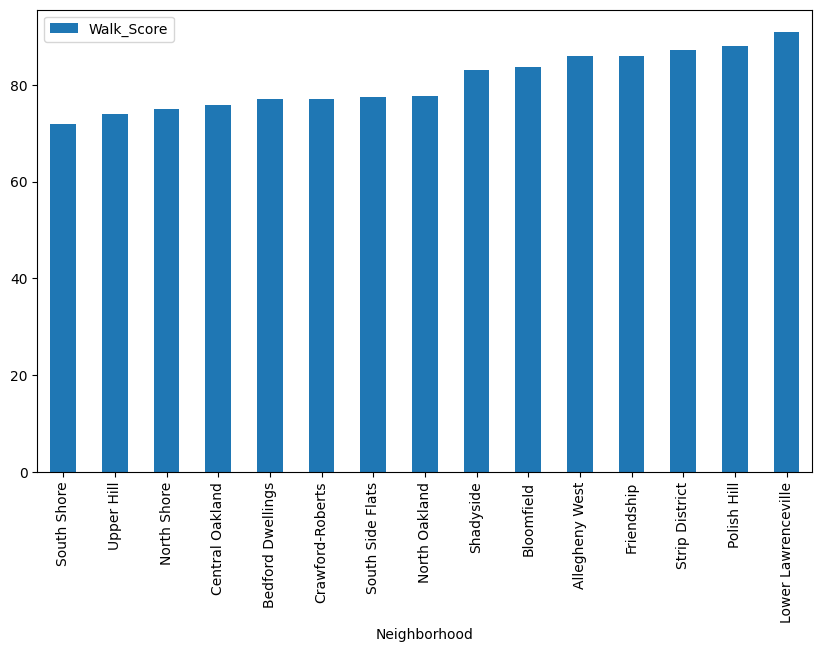

In [44]:
avgWalk.tail(15).plot.bar(x="Neighborhood", y="Walk_Score",figsize=(10, 6) )

The top contenders are all close in average walk scores. but by this data the top 5 neighborhoods for walkability are

In [45]:
avgWalk.tail(5)

,Neighborhood,Walk_Score
56,Allegheny West,86.00
57,Friendship,86.00
55,Strip District,87.25
58,Polish Hill,88.00
59,Lower Lawrenceville,91.00


## Walkability

The data on this page is adapted from the Allegheny County walk scores database and Pittsburgh 2010 census track data both from WPRDC
The walk scores came in a two collumn csv with census tracts and walk scores. i had to create a map function to translate those census tracts into neighborhoods using the 2010 census track data, and remove duplicates.

from my data the top 5 neighborhoods are 

1. Lower Lawrenceville
2. Polish Hill
3. Strip District
4. Friendship
5. Allegheny West

My favorite neighborhood is north oakland which takes the 8th place on our list.

In [46]:
avgWalk.to_csv('Jackson-ranking.csv')

In [49]:
# writing list to a file for easier moving around
with open("Jackson-ranking.csv", "w+") as f:
    f.write("RANK,NEIGHBORHOOD\n")
    for index, value in avgWalk.sort_values('Walk_Score', ascending=False)['Neighborhood'].items():
        f.write(f"{60-index},{value}\n")

